In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis


from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,plot_confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA,KernelPCA

In [2]:
def plot_classification_performance(clf,X,y_true, step, binary):
   
    '''
    performance of classification is evaluated with:
    
    1) accuracy: (TP + TN)/(TP + TN + FP + FN)
    
    2) precision: TP / (TP + FP)
    
    3) recall (sensitivity, true positive rate): TP / (TP + FN)
    
    4) f_score: 2 * precision * recall / (precision + recall)
    
    5) precsion_recall_curve: x-axis: precision, y-axis: recall
    
    6) roc_curve: x-axis: true positive rate, y-axis: false positive rate
                
                true positive rate (recall, sensitivity): TP / (TP + FN)
                false positive rate (fall out, 1 - specificity): FP / (FP + TN) = 1 - specificity = 1 - TN / (TN + FP)
                
                specifity (or true negative rate): TN / (TN + FP) 
    
    7) confusion_matrix = [TP  FP
                           FN  TN]  
    
    '''
    
    accuracy = clf.score(X,y_true)
    
    if binary:
    
       
    
        y_pred = clf.predict(X)
        
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
    
    
        plot_roc_curve(clf, X, y_true)
        plt.title('{} ROC curve'.format(step))
    
        plot_precision_recall_curve(clf, X, y_true)
        plt.title('{} Precision Recall curve'.format(step))
        
        
        plot_confusion_matrix(clf,X, y_true)
        plt.title('{} Confusion Matrix'.format(step))
        
    else:
        
        
        n_classes = len(clf.classes_)
        #y_score = clf.predict_proba(X)
        y_score = clf.decision_function(X)
        y_pred = clf.predict(X)

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
    
        precision = dict()
        recall = dict()
        f_score = dict()
    
        y_true_dummies = pd.get_dummies(y_true, drop_first = False).values
    
        for i in range(n_classes):
        
            fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
            precision[i], recall[i],_ =  precision_recall_curve(y_true_dummies[:, i], y_score[:, i])
            
        report = classification_report(y_true,y_pred)
        print('{} Classification Report'.format(step))
        print(report)
                                                                
       
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('{} ROC curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label = 'Class {} (area = {:.2f})'.format(i, roc_auc[i]))
    
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        fig, ax = plt.subplots(figsize = figsize)

        ax.set_xlabel('Precision')
        ax.set_ylabel('Recall')
        ax.set_title('{} Precision Recall curve'.format(step))
        
        for i in range(n_classes):
            ax.plot(precision[i], recall[i], label = 'Class {}'.format(i))
        
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        sns.despine()
        plt.show()
    
        figsize=(8, 5)
        plot_confusion_matrix(clf,X,y_true)
        
        
    

In [3]:
breast_cancer_dataset = datasets.load_breast_cancer()

X_df = pd.DataFrame(breast_cancer_dataset.data)
X_fn = breast_cancer_dataset.feature_names
X_df.columns = X_fn


y_df = pd.DataFrame(breast_cancer_dataset.target)
y_df.columns = ['cancer_type']


In [4]:
X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y_df

,cancer_type
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## 1. Data Preprocessing

In [6]:
# features scaling

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_df.values)

X_scaled = pd.DataFrame(X_scaled)

X_scaled.columns = X_df.columns

y = y_df

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

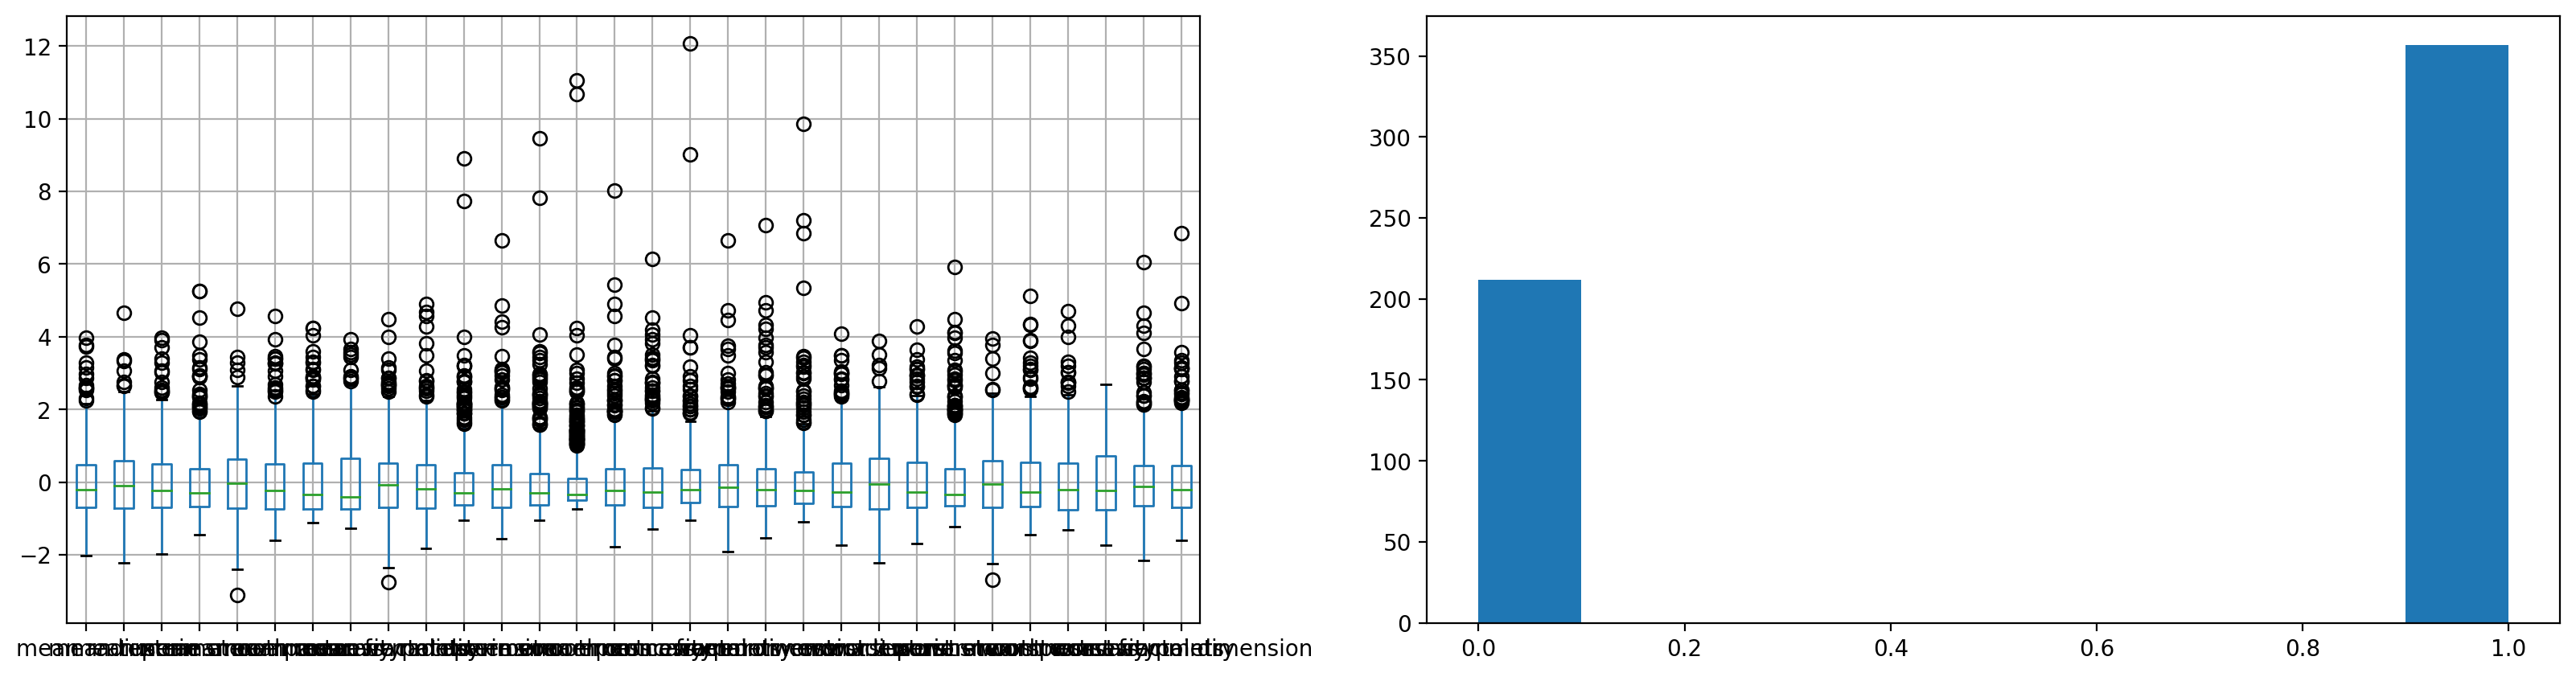

In [7]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_scaled.boxplot()

ax = fig.add_subplot(1,2,2)
plt.hist(y)

In [8]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers

def get_remove_outliers(X,y,q):
    
    data = np.column_stack((X.values,y.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_clean.columns = X.columns
    
    y_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_clean.columns = y.columns
    
    return X_clean,y_clean

In [9]:
q = 3

X_clean, y_clean = get_remove_outliers(X_scaled,y, q)

fraction_removed_outliers =  1 - X_clean.shape[0] / X_scaled.shape[0]

print('Removed {:.1f} % data'.format(fraction_removed_outliers * 100))

Removed 13.2 % data


Text(0.5, 1.0, 'y after removing outliers')

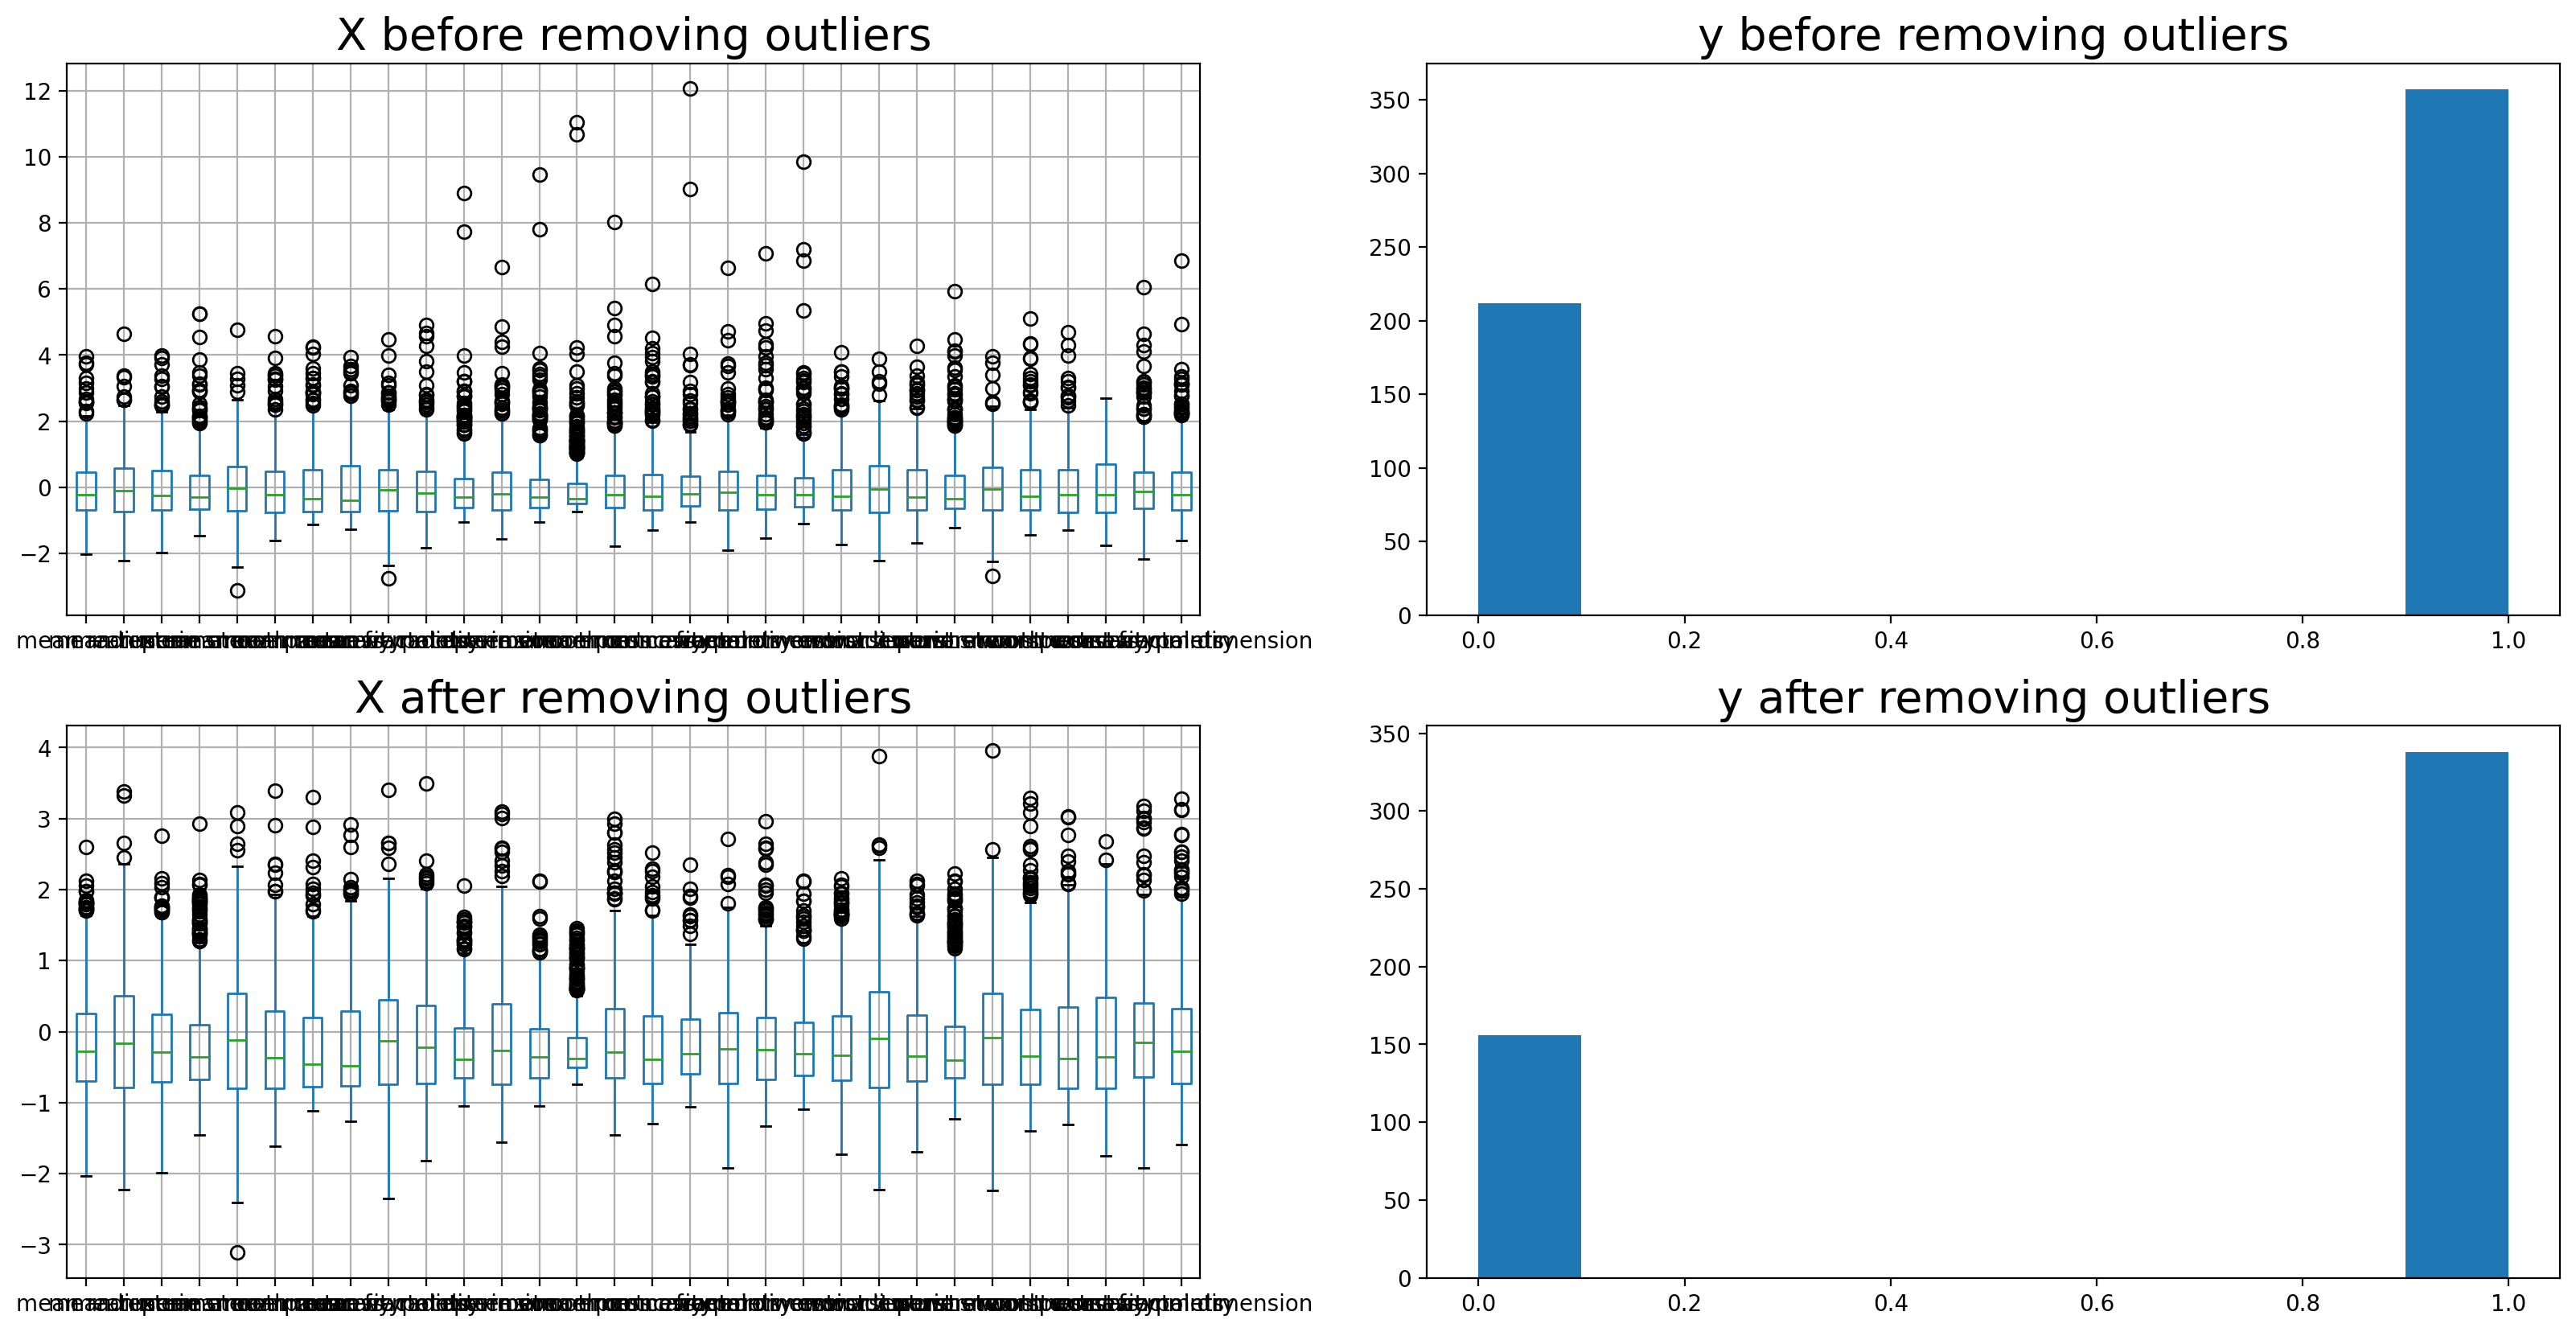

In [10]:
# data distribution after removing outliers

fig = plt.figure(figsize = (20,10), dpi = 200)

ax = fig.add_subplot(2,2,1)
X_scaled.boxplot()
plt.title('X before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,2)
plt.hist(y)
plt.title('y before removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,3)
X_clean.boxplot()
plt.title('X after removing outliers', fontsize = 20)

ax = fig.add_subplot(2,2,4)
plt.hist(y_clean)
plt.title('y after removing outliers', fontsize = 20)

## 2. Training Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_clean,y_clean, test_size = 0.33, random_state = 42)

## 3. Features Selection using Lasso Regularization with parameter C found by k-folds CV

We use penalty **'l1' to implement Lasso regularization**, for wich the coefficients of the features which are not relevant are set to 0. **The strenght of the regularization is given by the inverse of the parameter C**: the lower C, the stronger the regularization.

Text(0, 0.5, 'Cross-Val Accuracy')

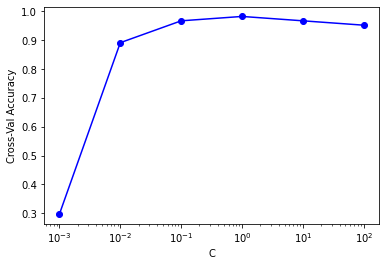

In [13]:
cv = 10

C_values = [0.001, 0.01, 0.1, 1.0, 10, 100]

cv_score = []

penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
fit_intercept = True
multi_class = 'auto'

for C in C_values:
    


    log_reg = LogisticRegression(penalty = penalty, 
                                solver = solver,
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)
    
    cross_val = cross_val_score(estimator = log_reg, X = X_train.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(np.array(C_values),np.array(cv_score),'bo-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cross-Val Accuracy')

In [14]:
penalty = 'l1' # Lasso regularization
solver = 'liblinear'  # we need 'liblinear' to implement 'l1' norm
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                             solver = solver,
                             C = C, 
                             fit_intercept = fit_intercept, 
                             multi_class = multi_class)

log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [15]:
def get_lasso_log_reg(log_reg,X):
    
    imortant_features = X.columns[np.where(log_reg.coef_[0] !=0)[0]]
    
    X = X[imortant_features]
    
    return X

In [16]:
X_train_lasso_log_reg = get_lasso_log_reg(log_reg,X_train)
X_test_lasso_log_reg = get_lasso_log_reg(log_reg,X_test)

In [17]:
X_train_lasso_log_reg

,mean concavity,mean concave points,radius error,smoothness error,compactness error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst concavity,worst concave points
447,0.855002,1.175970,0.504307,-0.288338,-0.374915,-0.599617,-0.404693,1.157759,0.085131,1.040681,1.076575,0.737820,0.497558,0.554153
108,2.080367,1.701909,0.325291,-0.669353,0.352767,-0.576612,-0.215945,1.317213,1.286918,1.234289,1.245335,-0.213419,1.415804,0.892184
37,0.424367,0.631459,-0.426147,-0.169667,-0.118382,-0.376832,-0.057458,-0.124082,0.370108,-0.132881,-0.213029,2.026595,1.095810,1.434251
157,-0.819454,-0.861239,-0.791399,0.263351,-0.933475,1.313423,-0.683464,-0.766038,0.130727,-0.824806,-0.687490,0.141652,-0.883505,-1.089406
460,-0.451719,-0.116567,0.119927,-0.151332,-0.409566,-0.265440,-0.558641,-0.573451,0.374993,-0.558223,-0.577093,0.110966,-0.650489,-0.207176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.049099,0.189608,1.026560,-0.871028,0.102382,-0.029337,-0.419444,1.253017,0.008594,1.219396,1.155681,-1.326851,0.232735,0.109537
270,-0.946385,-0.823580,-0.098791,0.105345,-0.820913,1.669394,-0.315425,-0.697700,-0.890303,-0.759575,-0.641081,-2.116335,-1.198510,-1.313846
348,0.392979,1.014241,0.175148,0.063343,0.125297,-0.775181,-0.173581,0.996235,-0.043516,0.918559,0.823436,0.693984,0.277832,1.260668
435,0.588837,0.481596,0.252385,0.879709,0.731139,0.459820,1.210441,-0.053674,1.182698,-0.037566,-0.162753,2.061664,0.316212,0.570903


## 4. Features Selection using Random Forest Classifier

In [50]:
def get_RF_features_importances(rf,X,feature_threshold, plot):
    
    features_names = X.columns
    
    data = {'feature_name' : features_names,'feature_importance' : rf.feature_importances_}
    
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending=False,inplace=True)
    
    selected_features = fi_df['feature_name'].values[:feature_threshold]
    
    X_rf = X[selected_features]
    
    if plot:

        #Define size of bar plot
        plt.figure(figsize = (10,8))
        #Plot Searborn bar chart
        sns.barplot(x = fi_df['feature_importance'], y = fi_df['feature_name'])
        #Add chart labels
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature Name')
    

    return X_rf

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RF Train Accuracy: 1.000
RF Test Accuracy: 0.976


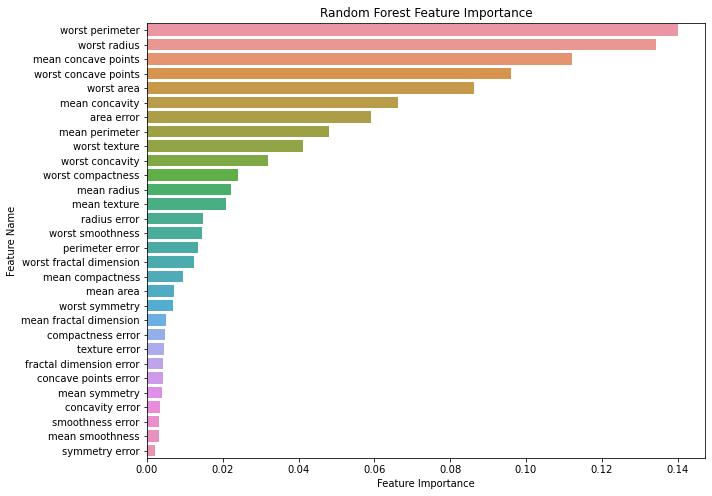

In [51]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print('RF Train Accuracy: {:.3f}'.format(train_acc))
print('RF Test Accuracy: {:.3f}'.format(test_acc))

feature_threshold = 12

X_train_rf = get_RF_features_importances(rf, X_train, feature_threshold, plot = True)
X_test_rf = get_RF_features_importances(rf, X_test, feature_threshold, plot = False)

In [52]:
X_train_rf

,worst perimeter,worst radius,mean concave points,worst concave points,worst area,mean concavity,area error,mean perimeter,worst texture,worst concavity,worst compactness,mean radius
447,1.040681,1.157759,1.175970,0.554153,1.076575,0.855002,0.594550,1.187553,0.085131,0.497558,-0.004231,1.187949
108,1.234289,1.317213,1.701909,0.892184,1.245335,2.080367,0.505884,1.582979,1.286918,1.415804,0.838655,1.608290
37,-0.132881,-0.124082,0.631459,1.434251,-0.213029,0.424367,-0.353943,-0.246689,0.370108,1.095810,1.032677,-0.271884
157,-0.824806,-0.766038,-0.861239,-1.089406,-0.687490,-0.819454,-0.569120,-0.687837,0.130727,-0.883505,-0.981341,-0.658144
460,-0.558223,-0.573451,-0.116567,-0.207176,-0.577093,-0.451719,-0.212912,-0.662299,0.374993,-0.650489,-0.438078,-0.675185
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.219396,1.253017,0.189608,0.109537,1.155681,0.049099,0.899714,1.294648,0.008594,0.232735,-0.177261,1.383918
270,-0.759575,-0.697700,-0.823580,-1.313846,-0.641081,-0.946385,-0.201911,-0.550673,-0.890303,-1.198510,-1.317732,-0.482055
348,0.918559,0.996235,1.014241,1.260668,0.823436,0.392979,0.208420,1.063983,-0.043516,0.277832,0.758501,1.097064
435,-0.037566,-0.053674,0.481596,0.570903,-0.162753,0.588837,-0.028318,0.014868,1.182698,0.316212,0.905449,-0.087275


## 5. Fit Logistic Regression on number of features filtered by importance from RF and find the optimal number of features with k-folds CV

Text(0, 0.5, 'Cross-Val Accuracy')

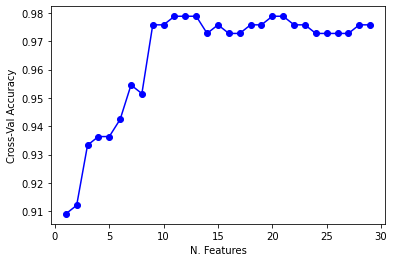

In [53]:
# find the optimal number of features to be selected

cv = 10

feature_threshold = np.arange(1,30)

cv_score = []

for ft in feature_threshold:
    
    X_train_rf = get_RF_features_importances(rf, X_train, ft, plot = False)
    
    cross_val = cross_val_score(estimator = log_reg, X = X_train_rf.values, y = y_train.values.ravel(), cv = cv)
    
    cv_score.append(np.average(cross_val))
    
    
plt.plot(feature_threshold,np.array(cv_score),'bo-')
plt.xlabel('N. Features')
plt.ylabel('Cross-Val Accuracy')

In [54]:
# extract from the train and test datasets the relevant features found with k-folds cv

ft = 11

X_train_rf = get_RF_features_importances(rf, X_train, ft, plot = False)
X_test_rf = get_RF_features_importances(rf, X_test, ft, plot = False)

In [55]:
X_train_rf

,worst perimeter,worst radius,mean concave points,worst concave points,worst area,mean concavity,area error,mean perimeter,worst texture,worst concavity,worst compactness
447,1.040681,1.157759,1.175970,0.554153,1.076575,0.855002,0.594550,1.187553,0.085131,0.497558,-0.004231
108,1.234289,1.317213,1.701909,0.892184,1.245335,2.080367,0.505884,1.582979,1.286918,1.415804,0.838655
37,-0.132881,-0.124082,0.631459,1.434251,-0.213029,0.424367,-0.353943,-0.246689,0.370108,1.095810,1.032677
157,-0.824806,-0.766038,-0.861239,-1.089406,-0.687490,-0.819454,-0.569120,-0.687837,0.130727,-0.883505,-0.981341
460,-0.558223,-0.573451,-0.116567,-0.207176,-0.577093,-0.451719,-0.212912,-0.662299,0.374993,-0.650489,-0.438078
...,...,...,...,...,...,...,...,...,...,...,...
106,1.219396,1.253017,0.189608,0.109537,1.155681,0.049099,0.899714,1.294648,0.008594,0.232735,-0.177261
270,-0.759575,-0.697700,-0.823580,-1.313846,-0.641081,-0.946385,-0.201911,-0.550673,-0.890303,-1.198510,-1.317732
348,0.918559,0.996235,1.014241,1.260668,0.823436,0.392979,0.208420,1.063983,-0.043516,0.277832,0.758501
435,-0.037566,-0.053674,0.481596,0.570903,-0.162753,0.588837,-0.028318,0.014868,1.182698,0.316212,0.905449


In [56]:
# fit the logistic regression

penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train_rf, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        98
         1.0       0.98      0.99      0.99       232

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



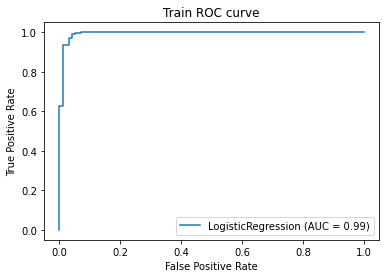

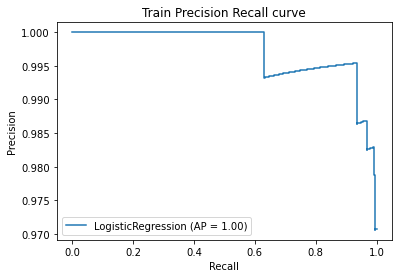

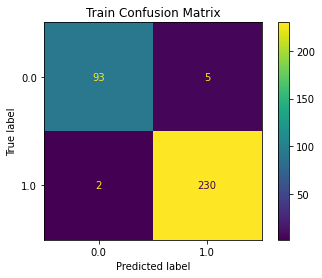

In [57]:
# train performance

plot_classification_performance(log_reg, X_train_rf,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        58
         1.0       0.96      0.98      0.97       106

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



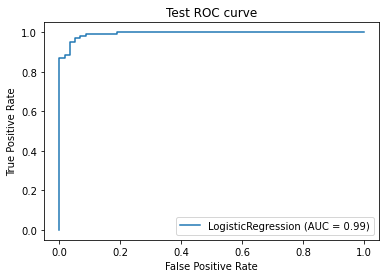

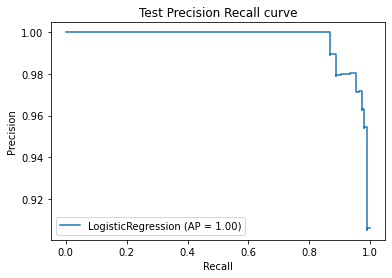

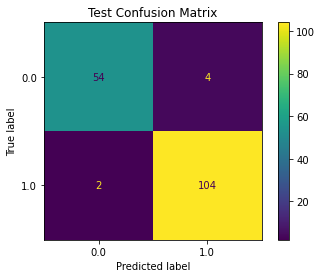

In [58]:
# test performance

plot_classification_performance(log_reg, X_test_rf,y_test, step ='Test', binary = True)

## 6. Reduce the dimensionality of the dataset with PCA and then fit Logistic Regression

In [59]:
def get_pca(X, n_components):

    pca = PCA(n_components = n_components)

    pca.fit(X)

    X_pca = pca.fit_transform(X)

    X_pca = pd.DataFrame(X_pca)
    
    fn = []
    
    for i in range(n_components):
        
        fn.append('component ' + str(i + 1))
        
    X_pca.columns = fn
    
    pve = pca.explained_variance_ratio_
    
    for i in range(n_components):
    
        print('PVE component {}: {:.1f} %'.format(i + 1, pve[i] * 100))
    print('Cumulative PVE: {:.1f} %'.format(sum(pve)*100))
    
    return X_pca, pca, pve

In [60]:
n_components = 14

X_train_pca, pca, pve= get_pca(X_train,n_components)
X_test_pca = pca.fit_transform(X_test)

PVE component 1: 43.4 %
PVE component 2: 18.6 %
PVE component 3: 10.1 %
PVE component 4: 7.2 %
PVE component 5: 6.1 %
PVE component 6: 4.2 %
PVE component 7: 1.8 %
PVE component 8: 1.7 %
PVE component 9: 1.3 %
PVE component 10: 1.1 %
PVE component 11: 1.1 %
PVE component 12: 0.7 %
PVE component 13: 0.7 %
PVE component 14: 0.5 %
Cumulative PVE: 98.7 %


In [61]:
# the biplot illustrates the loading vectors of each features and 
# the data plotted in the principal component space

# in an element phi_jm of the loading vector phi_m of the feature m associated with the feature j
# has a high positive value, it means that the feature j has a high contribution to the component m


def get_biplot(X_pca,comp_ax_hor,comp_ax_ver,features_names):
    
    score = X_pca.values
    coeff = np.transpose(pca.components_[[comp_ax_hor-1,comp_ax_ver-1], :])
    
    
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig = plt.figure(figsize = (10,10))
    plt.scatter(xs * scalex,ys * scaley,s=5)
    plt.xlabel('Component {}'.format(comp_ax_hor))
    plt.ylabel('Component {}'.format(comp_ax_ver))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if features_names is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features_names[i], color = 'g', ha = 'center', va = 'center')

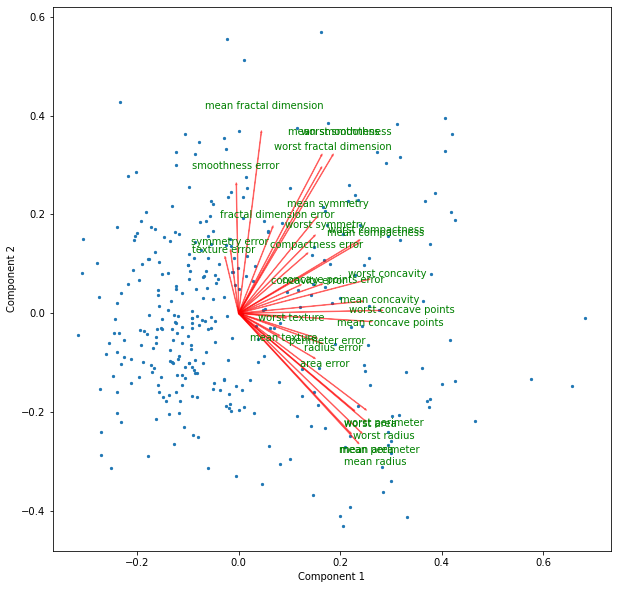

In [62]:
comp_ax_hor = 1

comp_ax_ver = 2

features_names = X_train.columns

get_biplot(X_train_pca,comp_ax_hor, comp_ax_ver, features_names )

In [63]:
# fit the logistic regression

penalty = 'l2'
C = 1
fit_intercept = True
multi_class = 'auto'

log_reg = LogisticRegression(penalty = penalty, 
                                 C = C, 
                                 fit_intercept = fit_intercept, 
                                 multi_class = multi_class)

log_reg.fit(X_train_pca, y_train)


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1)

Train Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        98
         1.0       0.98      1.00      0.99       232

    accuracy                           0.99       330
   macro avg       0.99      0.98      0.99       330
weighted avg       0.99      0.99      0.99       330



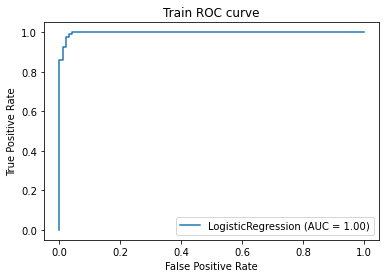

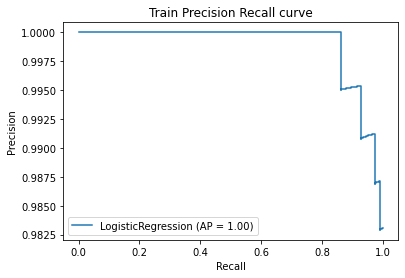

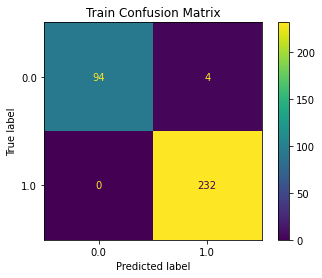

In [64]:
# train performance

plot_classification_performance(log_reg, X_train_pca,y_train, step ='Train', binary = True)

Test Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92        58
         1.0       0.94      0.98      0.96       106

    accuracy                           0.95       164
   macro avg       0.95      0.93      0.94       164
weighted avg       0.95      0.95      0.94       164



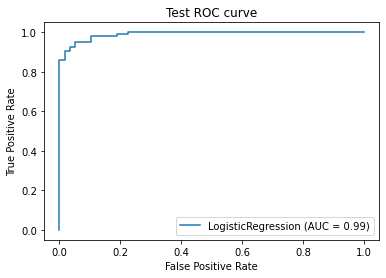

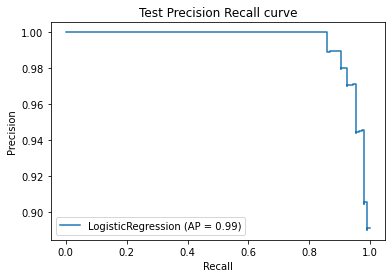

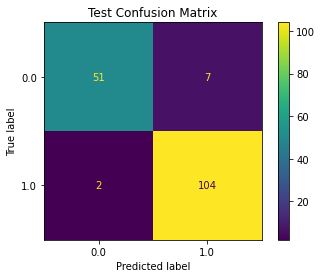

In [65]:
# test performance

plot_classification_performance(log_reg, X_test_pca,y_test, step ='Test', binary = True)